In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import grey2rgb
from skimage.color import rgb2gray

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')

In [8]:
batch_size = 32
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'alzheimer/training',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['MildDemented','NonDemented','VeryMildDementedd','ModerateDemented'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

Found 200 images belonging to 4 classes.


In [9]:
train_dataset  = train_datagen.flow_from_directory(directory = r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 128)

Found 200 images belonging to 4 classes.


In [10]:
valid_dataset = valid_datagen.flow_from_directory(directory = r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 40 images belonging to 4 classes.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.63it/s]


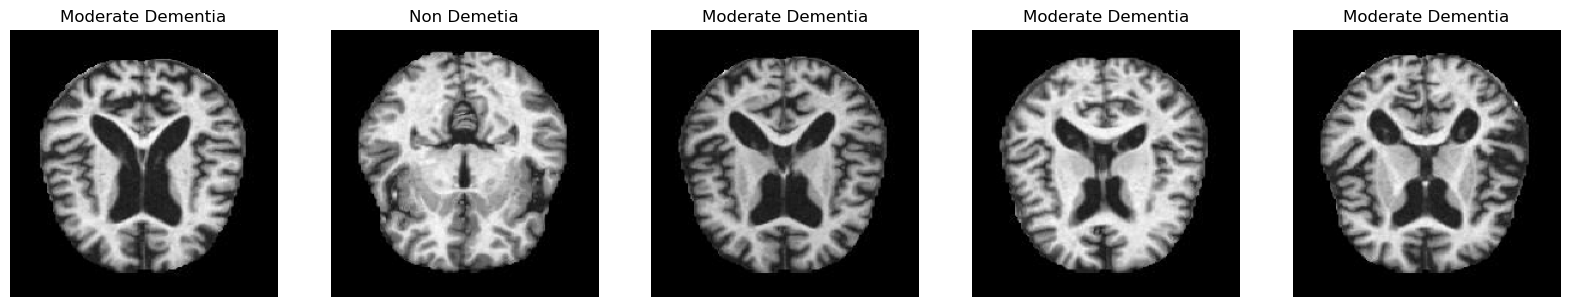

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(50)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(4, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n


In [15]:
n_epochs = 30

history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

model.save('model2.h5')


Epoch 1/30
6/6 [==============================] - 4s 517ms/step - loss: 1.4312 - acc: 0.2560
Epoch 2/30
6/6 [==============================] - 3s 421ms/step - loss: 1.3820 - acc: 0.3393
Epoch 3/30
6/6 [==============================] - 3s 407ms/step - loss: 1.3738 - acc: 0.2679
Epoch 4/30
6/6 [==============================] - 3s 409ms/step - loss: 1.2868 - acc: 0.4226
Epoch 5/30
6/6 [==============================] - 3s 417ms/step - loss: 1.1515 - acc: 0.4405
Epoch 6/30
6/6 [==============================] - 3s 411ms/step - loss: 1.0799 - acc: 0.4643
Epoch 7/30
6/6 [==============================] - 3s 497ms/step - loss: 0.9123 - acc: 0.5521
Epoch 8/30
6/6 [==============================] - 3s 485ms/step - loss: 0.9203 - acc: 0.5521
Epoch 9/30
6/6 [==============================] - 3s 492ms/step - loss: 0.8584 - acc: 0.6042
Epoch 10/30
6/6 [==============================] - 3s 425ms/step - loss: 0.9726 - acc: 0.5655
Epoch 11/30
6/6 [==============================] - 3s 449ms/step - lo

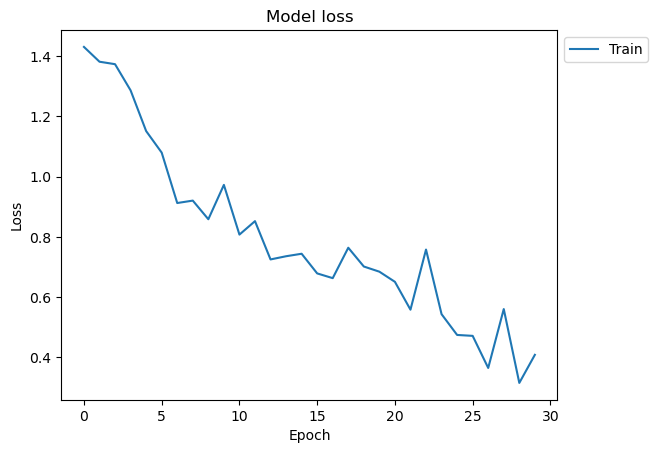

In [16]:

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

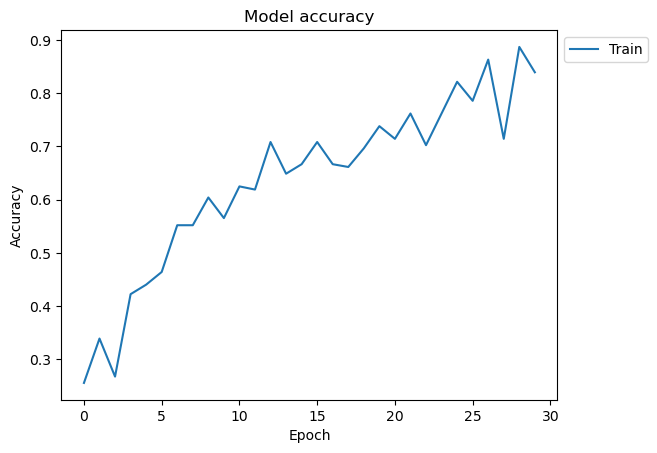

In [18]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [20]:
# Test Data 

test_dataset  = test_datagen.flow_from_directory(directory = r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/testing',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 200 images belonging to 4 classes.


1/1 [==============================] - 0s 220ms/step
NonDemented


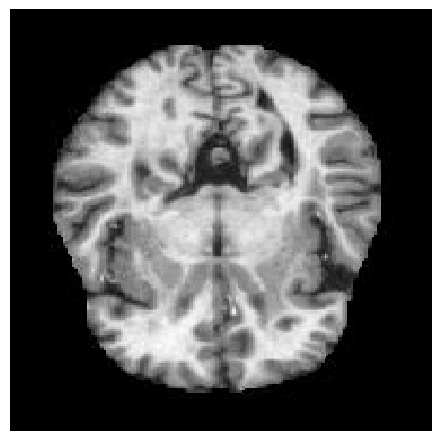

In [21]:
# Test Case 1: Non-Dementia
import numpy as np
from keras_preprocessing import image
import easygui

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/NonDemented/nonDem0.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
test_image = image.load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/NonDemented/nonDem0.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][1] == 1:
    prediction = "NonDemented"
elif result[0][0] == 1:
    prediction = "MildDemented"
elif result[0][2] == 1:
    prediction = "VeryMildDementedd"
elif result[0][3] == 1:
    prediction = "ModerateDemented"

print(prediction)




1/1 [==============================] - 0s 51ms/step
MildDemented


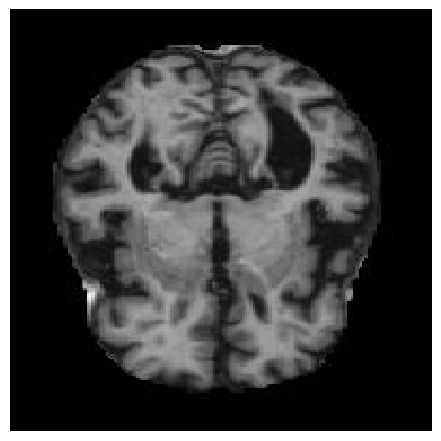

In [19]:
# Test Case 2: Mild Demented
import numpy as np
from keras_preprocessing import image
import easygui

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/MildDemented/mildDem0.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
test_image = image.load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/MildDemented/mildDem0.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][1] == 1:
    prediction = "NonDemented"
elif result[0][0] == 1:
    prediction = "MildDemented"
elif result[0][2] == 1:
    prediction = "VeryMildDementedd"
elif result[0][3] == 1:
    prediction = "ModerateDemented"

print(prediction)





1/1 [==============================] - 0s 16ms/step
ModerateDemented


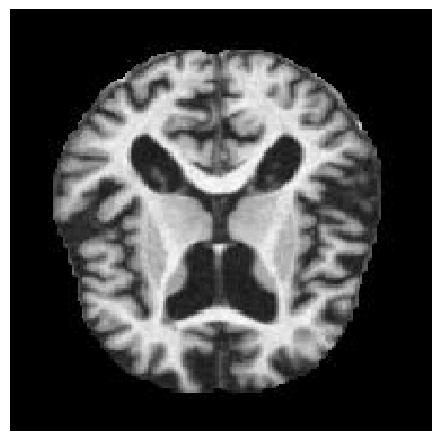

In [22]:
# Test Case 3: Moderate Demented
import numpy as np
from keras_preprocessing import image
import easygui

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/ModerateDemented/moderateDem26.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
test_image = image.load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/ModerateDemented/moderateDem26.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][1] == 1:
    prediction = "NonDemented"
elif result[0][0] == 1:
    prediction = "MildDemented"
elif result[0][2] == 1:
    prediction = "VeryMildDementedd"
elif result[0][3] == 1:
    prediction = "ModerateDemented"

print(prediction)






1/1 [==============================] - 0s 32ms/step
VeryMildDementedd


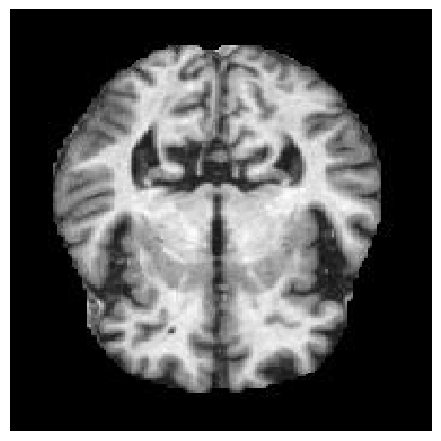

In [23]:
# Test Case 4: Very Mild Demented
# Test Case 3: Moderate Demented
import numpy as np
from keras_preprocessing import image
import easygui

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/VeryMildDementedd/verymildDem1.jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)
test_image = image.load_img(r'C:/Users/SRI DHARSHINI/alzheimerrr/alzheimer/training/VeryMildDementedd/verymildDem1.jpg', target_size = (200,200))
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result[0][1] == 1:
    prediction = "NonDemented"
elif result[0][0] == 1:
    prediction = "MildDemented"
elif result[0][2] == 1:
    prediction = "VeryMildDementedd"
elif result[0][3] == 1:
    prediction = "ModerateDemented"

print(prediction)




